In [7]:
import itertools

import numpy as np
import pandas as pd

import altair as alt
import altair_catplot as altcat

In [21]:
df_resampled = pd.read_csv('../data/130315_1A_aanat2_resampled.csv')

In [22]:
df_resampled.head()

,location,time,activity,zeit,zeit_ind,day,genotype,light
0,1,2013-03-15 18:30:00,85.888889,-14.500000,-869,4,het,True
1,1,2013-03-15 18:40:00,4.500000,-14.333333,-860,4,het,True
2,1,2013-03-15 18:50:00,0.000000,-14.166667,-850,4,het,True
3,1,2013-03-15 19:00:00,0.000000,-14.000000,-840,4,het,True
4,1,2013-03-15 19:10:00,0.000000,-13.833333,-830,4,het,True


In [34]:
df_resampled['genotype'].unique()

array(['het', 'wt', 'mut'], dtype=object)

In this problem, you will work with your group to come up with some good ways to parametrize sleep behavior and estimate the values of these parameters. Choose two different ways to parametrize sleep behavior. You can use sleep metrics from the Prober, et al. paper or (for more fun) invent your own. For each of the ways of parametrizing sleep, provide instructive plots and estimate the values of the parameters. Be sure to discuss the rationale behind choosing your parametrizations.

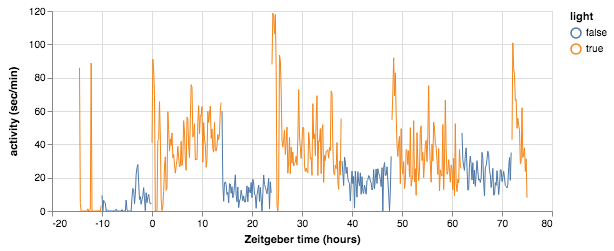

In [23]:
def plot_trace(df, col='activity', location=1, units='sec/min'):
    """Plot a trace, coloring by light."""
    charts = []
    for day, light in itertools.product(df['day'].unique(), 
                                        df['light'].unique()):
        inds = ( (df['location'] == location) 
                & (df['day'] == day) 
                & (df['light'] == light))

        charts.append(
            alt.Chart(df.loc[inds, ['zeit', col, 'light']],
                  height=200,
                  width=500
                ).mark_line(
                    strokeWidth=1,
                    strokeJoin='bevel'
                ).encode(
                    x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
                    y=alt.Y(f'{col}:Q', title=f'activity ({units})'),
                    color='light:N',
                    order='zeit:Q'
            )
        )

    return alt.layer(*charts)

plot_trace(df_resampled, col='activity', location=1)

Let's look at how much the average activity changes from light to dark for location 1.

In [33]:
df_resampled.loc[df_resampled['location'] == 1]['genotype'].unique()

array(['het'], dtype=object)

In [27]:
activity_light = df_resampled.loc[df_resampled['light'] == True]['activity'].values
activity_dark = df_resampled.loc[df_resampled['light'] == False]['activity'].values

In [29]:
mean_act_light = activity_light.mean()
mean_act_light

53.12096295736891

In [30]:
mean_act_dark = activity_dark.mean()
mean_act_dark

13.169326484018264

Now let's look at the average activity of all het genotypes vs wt vs mut. 

In [39]:
def find_mean_activity(df, genotype):
    df = df.loc[df['genotype'] == genotype]
    activity_light = df.loc[df['light'] == True]['activity'].values
    activity_dark = df.loc[df['light'] == False]['activity'].values
    mean_act_light = activity_light.mean()
    mean_act_dark = activity_dark.mean()
    return np.array([mean_act_light, mean_act_dark])

In [41]:
find_mean_activity(df_resampled, 'wt')

array([56.11467784,  8.70465686])

In [40]:
find_mean_activity(df_resampled, 'het')

array([53.75620042,  9.44758578])

In [42]:
find_mean_activity(df_resampled, 'mut')

array([49.8259072 , 22.37107955])

One thing we see is that the mutant type is a lot more active at night and potentially less active during the day. We can check something like standard deviation to see the spread of the mutant activity data vs wt and het and see what is significant.

**Questions to answer**: is it good to average across all members of the same genotype? what are the other factors that we need to consider? Do we need to look at zeit_ind, zeit, day and what info can we get from them? What about the transition times right between lights on and lights off?

We should also check for outliers? but "You do not need to do any data validation (we'll get to that next week). You can download and use the resampled data set you generated in Tutorial 2 here. If you feel that you need to use the original data set, you can get the activity file here and the genotypes file here."

We could make sure to capture more data by looking at the dataframe that was not resampled. But we should also think about reducing noise? Since we are capturing noise as well if we use the nonresampled data.

### Some information from the paper

The Videotrack quantization parameters were set as follows: detection threshold, 40; burst (threshold for very large movement), 25; freeze (threshold for no movement), 4; bin size, 60 s. The data were further analyzed using custom PERL software and Visual Basic Macros for Microsoft (Seattle, WA) Excel. Any 1 min bin with zero detectable movement was considered 1 min of rest because this duration of inactivity was correlated with an increased arousal threshold; a rest bout was defined as a continuous string of rest minutes. Sleep latency was defined as the length of time from lights out to the start of the first rest bout. An active minute was defined as a 1 min bin with any detectable activity. An active bout was considered any continuous stretch of 1 min bins with detectable movement.

To calculate transition frequencies between inactive, low-active, and high-active states, the total number of transitions from one state to another was divided by the total number of minutes spent in that state. A low-active state was defined as any 1 min period with activity that lasted 1 s or less, whereas a high-active state was defined as any 1 min period with >1 s of activity. Using these parameters, WT larvae in a normal LD cycle spend ∼30% of their time in each state.

Figure 5.
Characterization of wild-type larval zebrafish sleep/wake locomotor behavior. A , B , Each data point represents the seconds of locomotor activity every 10 min for a single larva ( A ) or averaged for 80 larvae ( B ). As shown in previous studies (Hurd and Cahill, 2002; Kaneko and Cahill, 2005), we found that zebrafish larvae exhibit high locomotor activity levels during the day and low levels at night beginning on the fifth day of development. Larvae move in short bursts of activity followed by pauses, such that the total amount of time a single larva moves each minute is typically 4–10 s during the day and 0–1 s at night. C , D , Pulses of sudden darkness provide a non-invasive assay of arousal levels. Each data point represents the seconds of locomotor activity every 30 s for a single larva ( C ) or averaged for 40 larvae ( D ). Larvae were exposed to alternating 30 min periods of light and darkness during the night. Individual larvae respond to most dark stimuli ( C ). No attenuation in the response was observed after multiple light/dark stimuli.

We next developed and applied an assay to test whether Hcrt modulates arousal thresholds, a key criterion for sleep/wake regulators. We found that most larvae become active for several minutes after exposure to sudden darkness, perhaps in response to a perceived threat such as the shadow of a predator (Fig. 5 C,D) (for movie, see http://www.mcb.harvard.edu/schier). Almost all larvae become active within 15 s of dark onset if they display any activity during the previous minute (Fig. 6 A). In contrast, 1 min or more of rest immediately before dark onset reduces the number of responding WT larvae (Fig. 6 A) and increases the average response latency (Fig. 6 B). These results indicate that rest before dark onset increases arousal thresholds in WT larvae. Responses after 2 or more minutes of rest are not significantly different from those after 1 min of rest (Fig. 6 A,B), indicating that as little as 1 min of rest can be considered a sleep-like state. Strikingly, Hcrt-overexpressing larvae have lower arousal thresholds than WT larvae. A larger proportion of Hcrt-overexpressing larvae respond to darkness after rest (Fig. 6 A), and response latency is shorter for Hcrt-overexpressing larvae compared with WT (Fig. 6 B). Thus, Hcrt-overexpressing larvae have reduced arousal thresholds and, similar to humans with chronic insomnia, are hypersensitive to arousing stimuli (Bonnet and Arand, 2000; American Academy of Sleep Medicine, 2001; Nofzinger et al., 2004; Mahowald and Schenck, 2005).

### Starting from the original data

In [9]:
# Load in the genotype file, call it df_gt for genotype DataFrame
df_gt = pd.read_csv('../data/130315_1A_genotypes.txt',
                    delimiter='\t',
                    comment='#',
                    header=[0, 1])

# Take a look at it
df_gt

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0
5,29.0,10,21.0
6,30.0,15,23.0
7,54.0,19,27.0
8,58.0,22,35.0


In [10]:
# Reset the columns to be the second level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

# Check out the new columns
df_gt.columns

Index(['WT 17', 'Het 34', 'Mut 22'], dtype='object')

In [11]:
df_gt.columns = ['wt', 'het', 'mut']


In [12]:
# Tidy the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [13]:
# Drop all rows that have a NaN in them
df_gt = df_gt.dropna()

# Take a look
df_gt

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0
5,wt,29.0
6,wt,30.0
7,wt,54.0
8,wt,58.0
9,wt,61.0


In [14]:
df_gt = df_gt.reset_index(drop=True)


In [15]:
df_gt.loc[:,'location'] = df_gt.loc[:, 'location'].astype(int)


In [16]:
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [17]:
df = pd.merge(df, df_gt)

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het


In [18]:
df['time'] = pd.to_datetime(df['time'])


In [19]:
df['time'].dt.time.head()


0    18:31:09
1    18:32:09
2    18:33:09
3    18:34:09
4    18:35:09
Name: time, dtype: object

In [20]:
df['light'] = (  (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time < pd.to_datetime('23:00:00').time()))

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True
